In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
base_path = "/content/drive/MyDrive/Colab Notebooks/data/instacart-market-basket-analysis/"

aisles = pd.read_csv(base_path + "aisles.csv")
orders = pd.read_csv(base_path + "orders.csv")
departments = pd.read_csv(base_path + "departments.csv")
prior = pd.read_csv(base_path + "order_products__prior.csv")
train = pd.read_csv(base_path + "order_products__train.csv")
products = pd.read_csv(base_path + "products.csv")

In [ ]:
##orders#.user_id.value_counts()

## user_id와 aisle을 같은 테이블에서 볼 수있도록 테이블들을 합쳐보세요!
## user_id -> order_id -> product_id -> aisle_id -> aisle
##                                   -> department_id -> department
prior = prior[:3000000]  ## 현실 가능한 분석을 위해서 일부만 사용합니다.

In [ ]:
data = pd.merge(orders, prior, on="order_id")
data = pd.merge(data, products, on="product_id")
data = pd.merge(data, aisles, on="aisle_id")
data = pd.merge(data, departments, on="department_id")
data

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,94891,4,prior,4,5,13,15.0,22199,1,0,Extra-Dry Cava,134,5,specialty wines champagnes,alcohol
1,31925,47329,prior,4,3,10,12.0,22199,1,0,Extra-Dry Cava,134,5,specialty wines champagnes,alcohol
2,137640,156057,prior,17,5,11,3.0,22199,2,0,Extra-Dry Cava,134,5,specialty wines champagnes,alcohol
3,120479,310,prior,93,3,15,2.0,20704,1,0,Brut,134,5,specialty wines champagnes,alcohol
4,135820,6770,prior,2,3,17,10.0,20704,6,0,Brut,134,5,specialty wines champagnes,alcohol
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,173376,197832,prior,18,3,12,18.0,39768,22,1,Rescue Natural Sleep Liquid Melts,6,2,other,other
2999996,10531,197832,prior,19,3,12,14.0,39768,8,1,Rescue Natural Sleep Liquid Melts,6,2,other,other
2999997,129685,202262,prior,28,0,13,7.0,10579,4,0,Himalayan Pink Salt Liquid Hand Soap,6,2,other,other
2999998,247879,204798,prior,40,2,15,8.0,32048,7,0,Beef Chuck Eye Steak,6,2,other,other


In [ ]:
# user-department matrix
customers = pd.crosstab(index=data.user_id, columns=data.department)
customers

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,,,
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,4,1,0,...,0,1,0,0,0,0,0,0,5,0
6,0,0,0,0,0,0,2,1,0,0,...,0,0,1,0,0,1,0,0,2,0
7,0,0,1,9,0,0,2,6,4,0,...,0,0,2,0,0,0,0,0,6,4
9,0,5,0,1,1,0,1,7,0,0,...,1,0,1,0,0,3,0,0,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206203,0,0,0,3,0,0,2,1,0,0,...,1,0,0,0,0,1,0,0,1,7
206204,0,0,2,0,0,0,0,1,1,0,...,0,0,1,0,0,1,0,0,2,0
206206,0,0,1,0,0,0,0,4,0,0,...,0,0,0,0,0,1,0,0,2,4


### data plotting


- 원본 데이터(고차원)의 분포 또는 모양을 확인하기 위해서는 눈으로 볼 수 있는 형태(2, 3차원)로 변환을 해야합니다.


- 원본 데이터 ------> 저차원 데이터(2차원) :  **t-SNE**


(t-SNE : t-distributed Stochastic Nearest Embedding)

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2,
            perplexity=30,
            learning_rate='warn',
            random_state=42,
            n_jobs=-1)

tsne_data = tsne.fit_transform(customers)
tsne_data

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


array([[  6.40535  , -36.85211  ],
       [ 13.151651 ,  -1.061725 ],
       [ 14.029759 , -27.090586 ],
       ...,
       [-17.387413 ,   5.6823573],
       [ 15.56864  ,  10.171998 ],
       [  1.9360418,  26.904142 ]], dtype=float32)

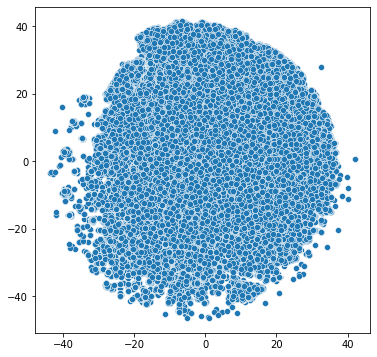

In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1])
plt.show()

### Clustering

1. K-means



2. Hierarchical Agglomerative Clustering

In [ ]:
X = customers  # customers 데이터에 있는 수치값들을 사용.

In [ ]:
start_K = int(input("실험에 사용될 시작 클러스터 개수를 입력하세요 : "))
end_K = int(input("실험에 사용될 마지막 클러스터 개수를 입력하세요 : "))

In [ ]:
## K-means에서 최적의 K(클러스터 수)를 찾기 위해서 적당한 구간에서 다 돌려보고, 가장 좋은 것을 찾습니다.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = []
preds = []

for K in range(start_K, end_K+1):
    model = KMeans(n_clusters=K) # 구분하는 집단의 갯수
    pred = model.fit_predict(X)
    preds.append(pred)
    score = silhouette_score(X, pred)
    scores.append(score)

optimal_K = np.argmax(scores) + start_K
print("Optimal K: %d with score: %.4f" % (optimal_K, np.max(scores)))

In [ ]:
# import pickle

# with open(base_path + "kmeans.pk", 'wb') as f:
#     pickle.dump(model, f)

In [ ]:
# with open(base_path + "kmeans.pk", 'rb') as f:
#     model = pickle.load(f)

# model

In [ ]:
# 클러스터 개수가 2일 때부터 10까지 다 돌린 결과 중에 가장 잘 나왔을 때의 Cluster label.
best_pred = preds[np.argmax(scores)] # 리스트[#]

In [ ]:
tsne_df = pd.DataFrame(data=tsne_data, columns=["X1", "X2"])
tsne_df['cluster'] = best_pred

In [ ]:
tsne_df

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x="X1", y="X2",
                hue='cluster', palette="Set3")
plt.savefig(base_path + "cluster_map.png")
plt.show()

In [ ]:
customers['label'] = best_pred
customers

In [ ]:
group1 = customers[customers["label"] == 0]
group2 = customers[customers.label == 1]

In [ ]:
display(group1.sum().sort_values(ascending=False)[:10])
group2.sum().sort_values(ascending=False)[:10]